In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
print('done')

done


In [5]:
df=pd.read_csv('Billionaire.csv')

In [6]:
df.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [7]:
df.isna().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

Age column contains null value

so we are droping those rows

In [34]:
df1=df1.dropna()
df1.isna().sum()

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

Now there is no null value

In [36]:
df1['NetWorth']

0       $177 B
1       $151 B
2       $150 B
3       $124 B
4        $97 B
         ...  
2750      $1 B
2751      $1 B
2752      $1 B
2753      $1 B
2754      $1 B
Name: NetWorth, Length: 2676, dtype: object

The NetWorth table has $ and B at the last position so we need to split this column and save a new column and the column is a object and we need to convert it as a float

In [40]:
df1['NetWorth']=df1['NetWorth'].str.strip('$')

In [54]:
df1['NetWorth']=df1['NetWorth'].str.strip('B')
df1['NetWorth']
df1["NetWorth"] = df1["NetWorth"].astype(float)

<AxesSubplot:xlabel='Name', ylabel='NetWorth'>

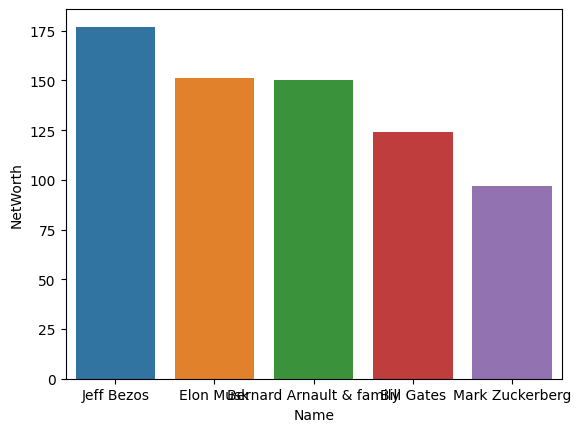

In [55]:
import seaborn as sns
top_5_billionaire =df1.head(5)
sns.barplot(top_5_billionaire,x='Name',y='NetWorth')

In [98]:
dfx=df1.groupby(['Industry']).size().reset_index(name='counts')
dfx=dfx.head(5)

dfx=dfx.sort_values(by=['counts'],ascending=False)
dfx

,Industry,counts
4,Fashion & Retail,268
2,Diversified,180
3,Energy,99
0,Automotive,67
1,Construction & Engineering,43


Visualizing by Industry wise

In [99]:
px.pie(dfx,values='counts',names='Industry', title="Visualizing Billionaire by Industry wise")

In [94]:
dfc=df1.groupby(['Country']).size().reset_index(name='count')
dfc=dfc.sort_values(by=['count'],ascending=False)
dfc=dfc.head(5)
dfc
fig=px.pie(dfc,names='Country',values='count')
fig.show()

In [113]:
dfi=df1[['Industry','Name']]
dfi=dfi.head(5)
dfi

,Industry,Name
0,Technology,Jeff Bezos
1,Automotive,Elon Musk
2,Fashion & Retail,Bernard Arnault & family
3,Technology,Bill Gates
4,Technology,Mark Zuckerberg
